<a href="https://colab.research.google.com/github/cybermax47/CS-351-AI-Lab-Github-repository-2022447/blob/main/2022447_CS_351_Lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab#07**



The code for feature selection and dimensionality reduction using the Iris dataset has been created. It includes:

1. **Loading and exploring the dataset**.
2. **Feature selection** using ANOVA F-Value to choose the top 2 features.
3. **PCA implementation** for reducing dimensionality to 2 components.
4. **Visualization** of the PCA-transformed data using a scatter plot.
5. **Variance analysis** to understand the explained variance by the PCA components.



Dataset Head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Class Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Selected Features: ['petal length (cm)', 'petal width (cm)']

Feature Scores: [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]


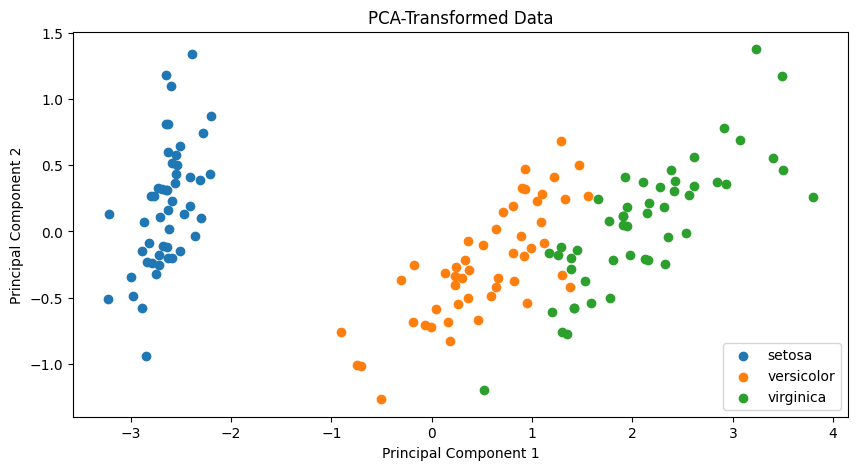


Explained Variance by PCA Components: [0.92461872 0.05306648]
Total Variance Explained by 2 Components: 0.98

Discussion:
The selected features using ANOVA F-value indicate the top contributors to class separation.
PCA, on the other hand, transforms the data into components that explain the maximum variance in the data.


In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load the Iris dataset
# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
labels = data.target

print("Dataset Head:")
print(df.head())
print("\nClass Labels:")
print(labels)

# Step 2: Statistical Feature Selection
# Use ANOVA F-value to select the top 2 features
selector = SelectKBest(score_func=f_classif, k=2)
selected_features = selector.fit_transform(df, labels)
selected_feature_names = [data.feature_names[i] for i in selector.get_support(indices=True)]

print("\nSelected Features:", selected_feature_names)
print("\nFeature Scores:", selector.scores_)

# Step 3: Principal Component Analysis (PCA)
# Reduce the dataset to 2 components using PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df)

# Step 4: Visualize the PCA-transformed data
plt.figure(figsize=(10, 5))
for class_label in np.unique(labels):
    plt.scatter(
        pca_transformed[labels == class_label, 0],
        pca_transformed[labels == class_label, 1],
        label=data.target_names[class_label]
    )
plt.title("PCA-Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Step 5: Analyze Variance Explained by PCA Components
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance by PCA Components:", explained_variance)
print(f"Total Variance Explained by 2 Components: {explained_variance.sum():.2f}")

# Discussion
print("\nDiscussion:")
print("The selected features using ANOVA F-value indicate the top contributors to class separation.")
print("PCA, on the other hand, transforms the data into components that explain the maximum variance in the data.")
